In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/auto_clean.csv')

In [5]:
df.sample(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
49,1,104,mazda,std,two,hatchback,fwd,front,93.1,0.764536,...,9.0,68.0,5000.0,31,38,6795.0,7.580645,Low,0,1
144,0,85,subaru,std,four,wagon,4wd,front,96.9,0.834214,...,9.0,82.0,4800.0,23,29,8013.0,10.217391,Low,0,1
95,2,168,nissan,std,two,hardtop,fwd,front,95.1,0.780394,...,9.4,69.0,5200.0,31,37,8249.0,7.580645,Low,0,1
189,0,122,volkswagen,std,four,wagon,fwd,front,100.4,0.879865,...,9.0,88.0,5500.0,25,31,12290.0,9.400000,Low,0,1
31,1,101,honda,std,two,hatchback,fwd,front,93.7,0.720807,...,10.1,60.0,5500.0,38,42,5399.0,6.184211,Low,0,1


In [6]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

### Sactter Plot

<IPython.core.display.Javascript object>


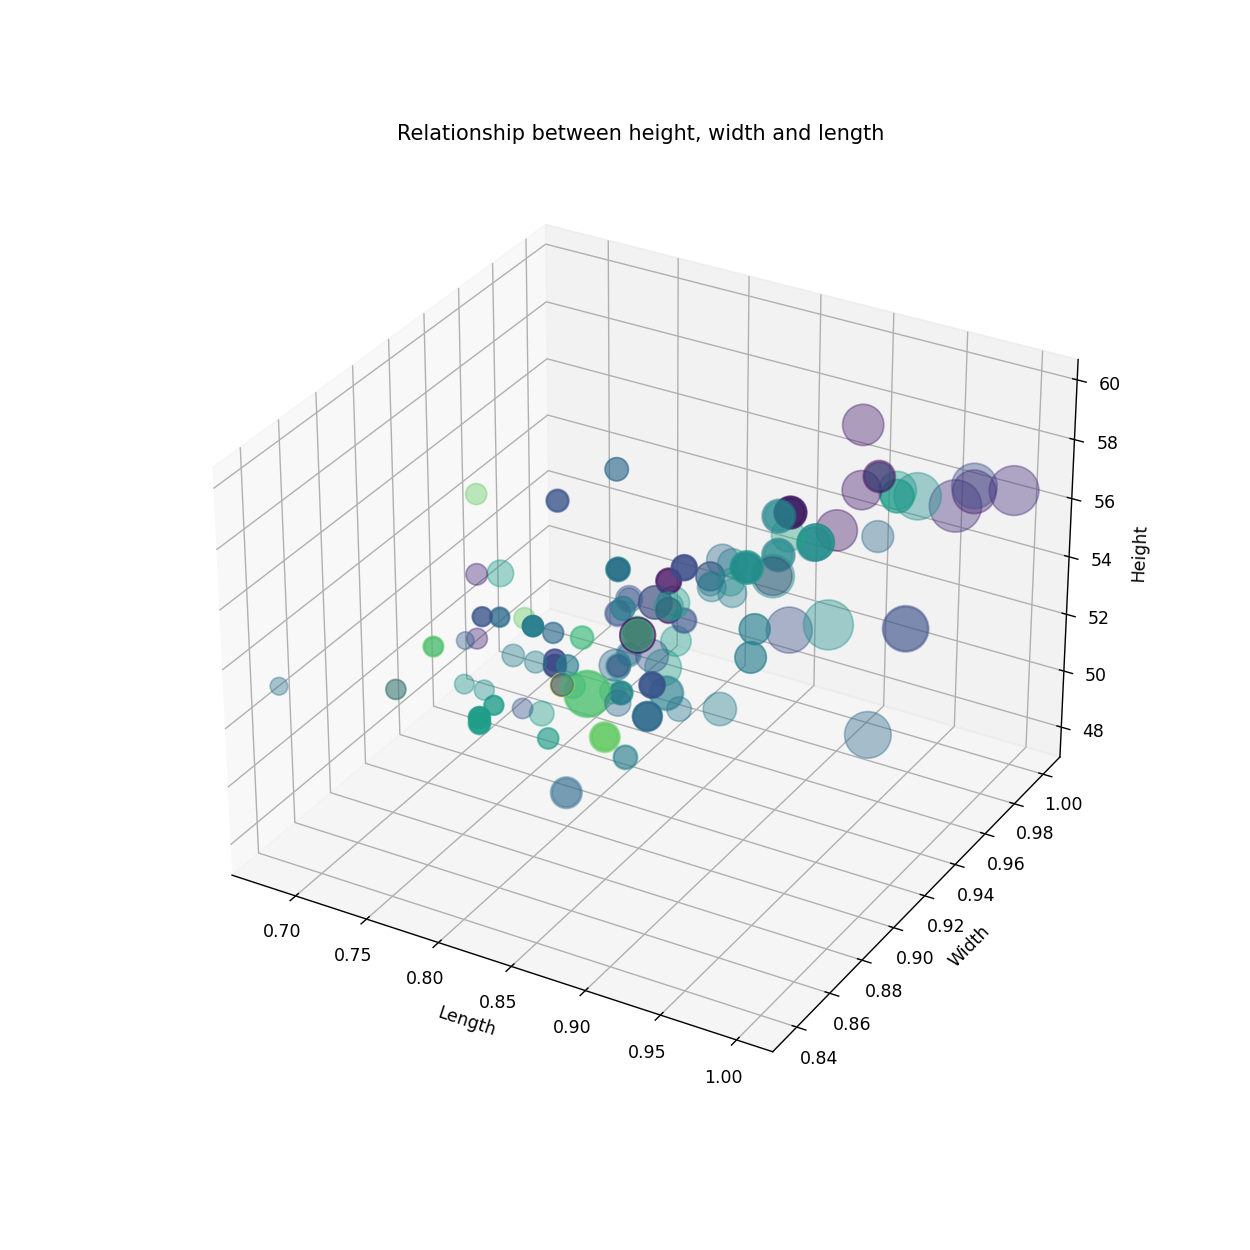

In [9]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
ax.scatter3D(df['length'], df['width'], df['height'],
            c = df['peak-rpm'], s = df['price']/50, alpha = 0.4)
ax.set_xlabel("Length")
ax.set_ylabel("Width")
ax.set_zlabel("Height")
ax.set_title("Relationship between height, width and length")
plt.show()

### Bar Plot

In [10]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [12]:
# strings need to be replaced with numeric values

df['body_style1'] = df['body-style'].replace({"convertible": 1,
                                              "hatchback": 2,
                                              "sedan": 3, 
                                              "wagon": 4,
                                              "hardtop": 5})

In [18]:
# find average peak rpm and price for each body style.

# gr = df.groupby("body_style1")['peak-rpm', 'price'].agg('mean')

# <ipython-input-17-fc721a7f5656>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
#   gr = df.groupby("body_style1")['peak-rpm', 'price'].agg('mean')

gr = df.groupby("body_style1")[['peak-rpm', 'price']].agg('mean')

In [19]:
gr

,peak-rpm,price
body_style1,,
1,5158.333333,21890.500000
2,5219.490727,9957.441176
3,5075.000000,14459.755319
4,5019.014778,12371.960000
5,5031.250000,22208.500000


In [20]:
# width of 0.3 on x-axis, width of 30 on y-axis, 
# height will be the value of the price column

# dx = 0.3
# dy = 30
# dz = gr['price']

<IPython.core.display.Javascript object>


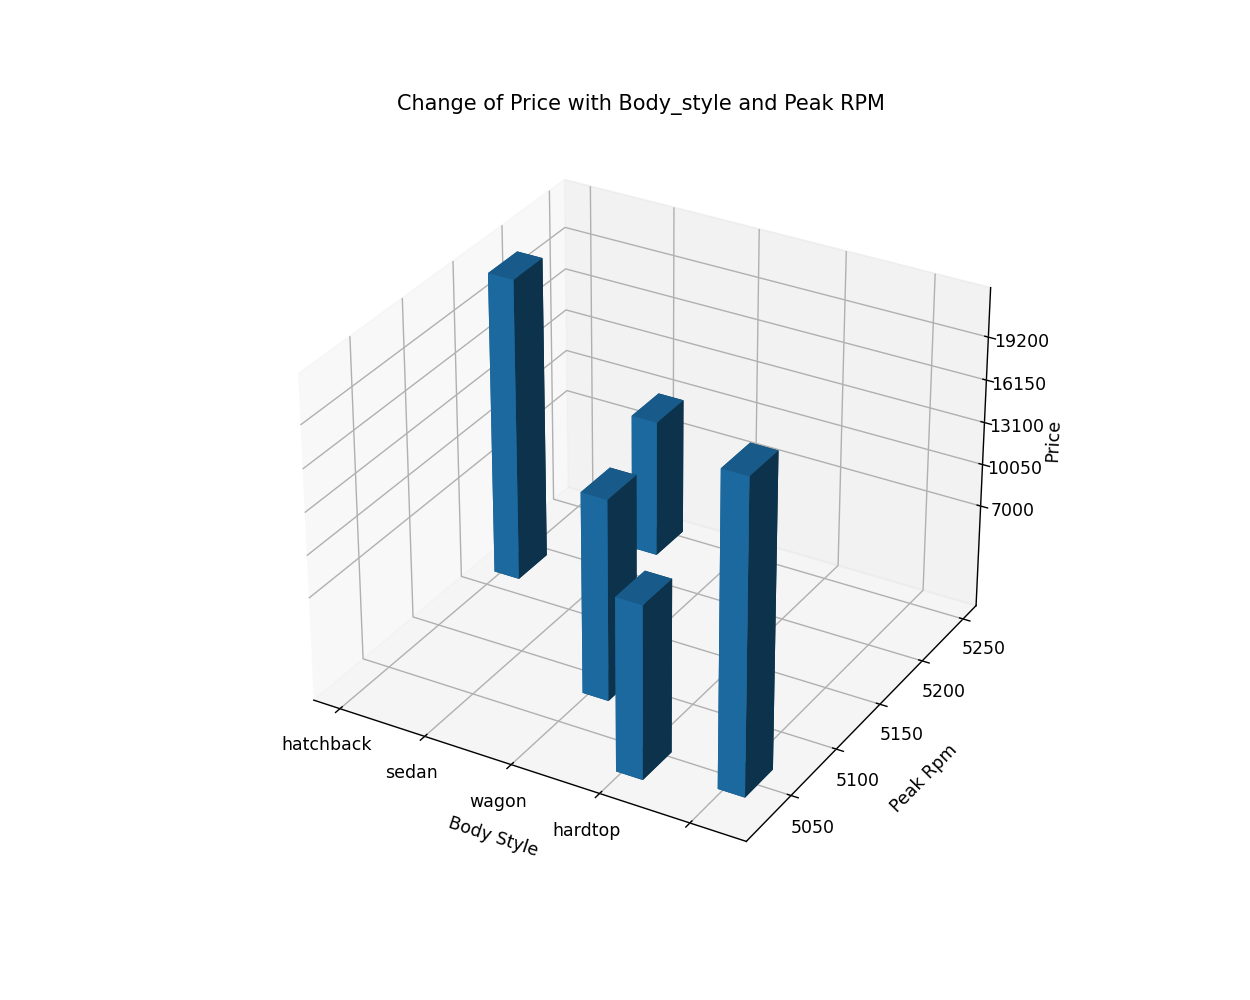

<ipython-input-23-7c79c101a117>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'])


In [23]:
%matplotlib notebook
x = gr.index
y = gr['peak-rpm']
z = [0]*5

colors = ["b", "g", "crimson", 'r', 'pink']

dx = 0.3 * np.ones_like(z)
dy = [30]*5
dz = gr['price']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.set_xticklabels(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'])
ax.set_xlabel("Body Style", labelpad = 7)
ax.set_yticks(np.linspace(5000, 5250, 6))

ax.set_ylabel("Peak Rpm", labelpad=10)

ax.set_zlabel("Price")
ax.set_zticks(np.linspace(7000, 22250, 6))
ax.set_title("Change of Price with Body_style and Peak RPM")

ax.bar3d(x, y, z, dx, dy, dz)

### Surface Plot

In [24]:
# For this type of plot one-dimensional x and y values do not work. So, we need to use the ‘meshgrid’ function 
# to generate a rectangular grid out of two one-dimensional arrays.

# This plot shows the relationship between two variables in a 3d setting.

# see the relationship between the length and width in this plot.

<IPython.core.display.Javascript object>


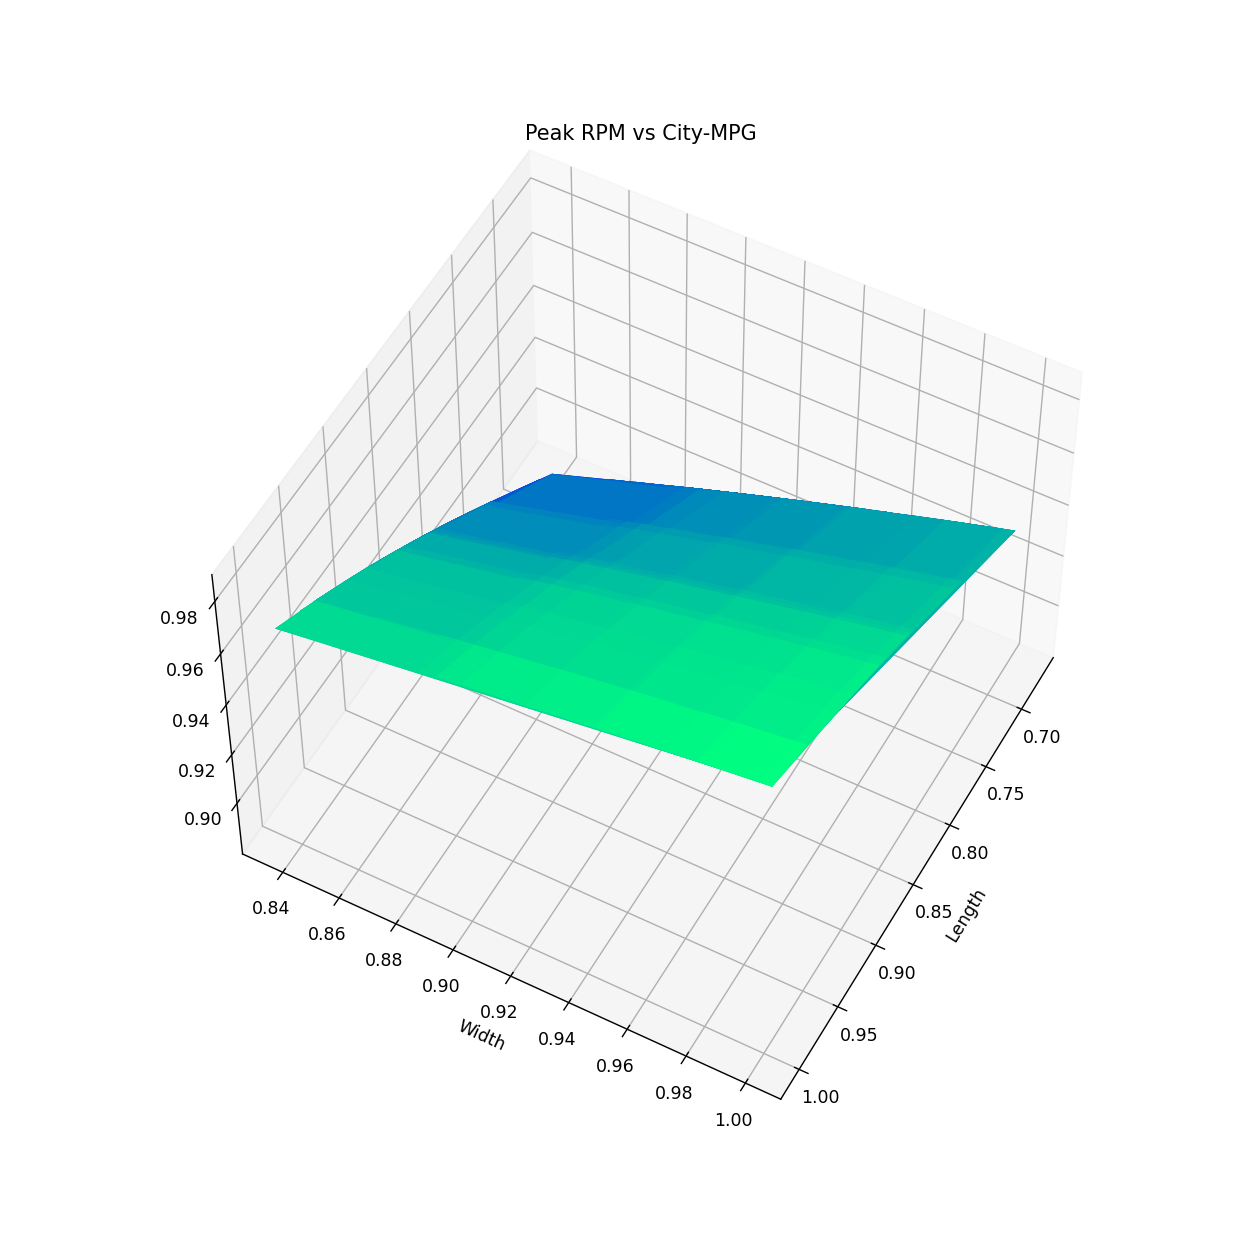

In [30]:
def z_function(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

x = df['length']
y = df['width']

X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
               cmap='winter', edgecolor='none')
ax.set_xlabel("Length")
ax.set_ylabel("Width")
ax.set_title("Peak RPM vs City-MPG")
ax.view_init(65, 30)

### Contour Plot

In [31]:
# see the relationship between the length and width in this plot.

# Here, sin function for z values is used. Cosine function can also be used.

<IPython.core.display.Javascript object>


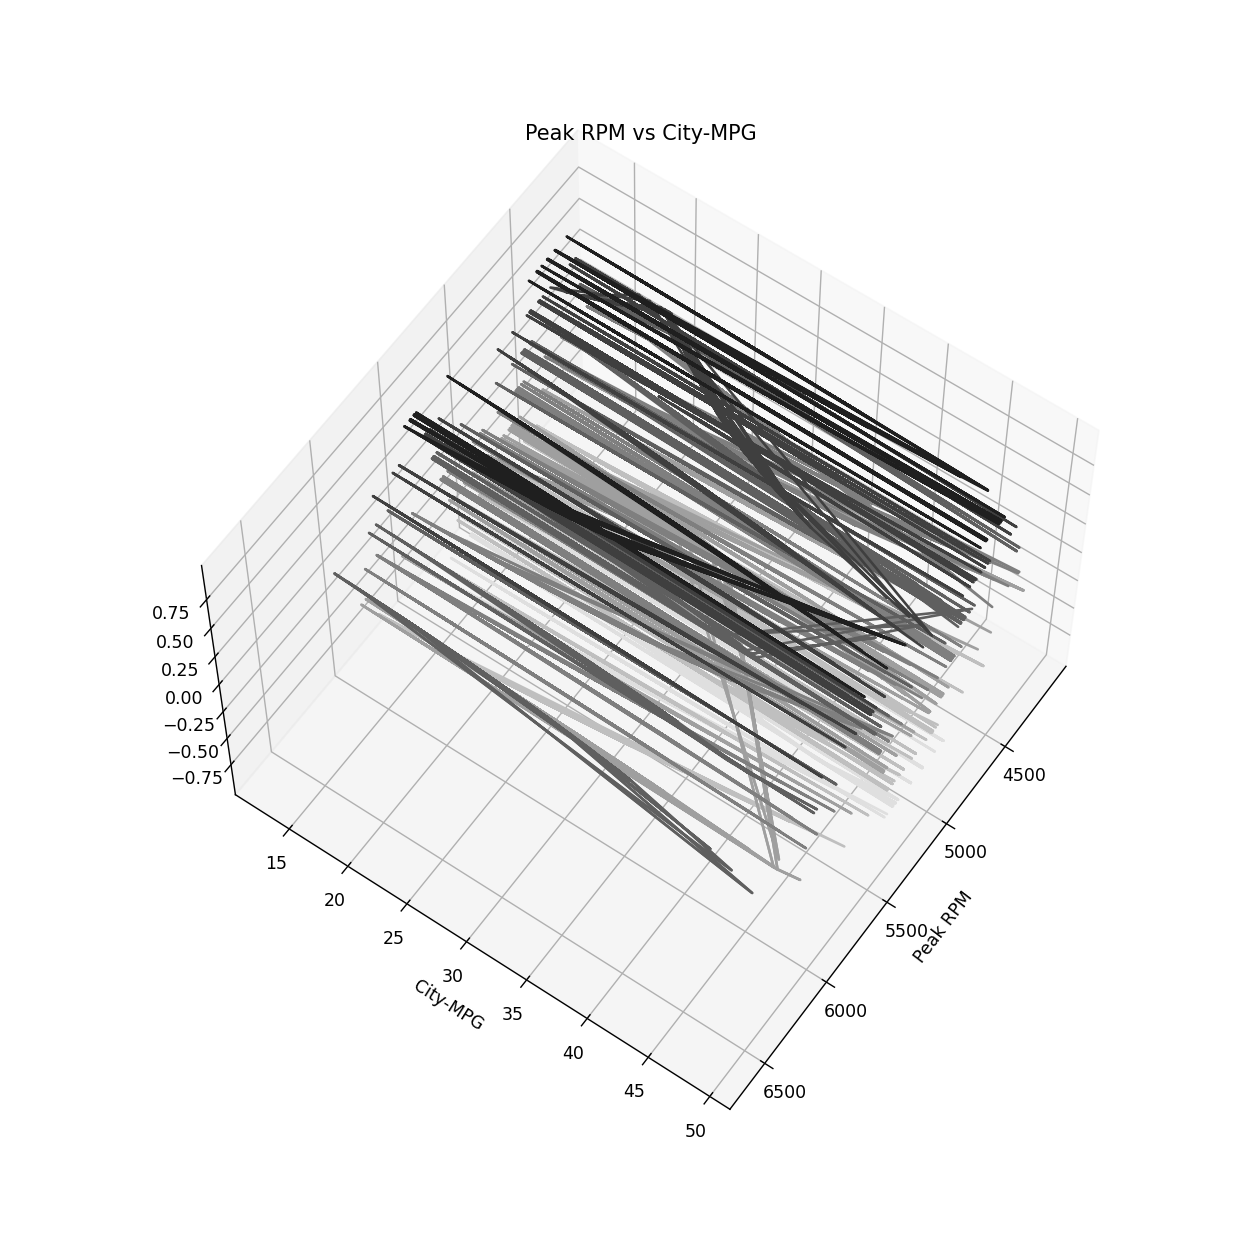

<ipython-input-32-67777cc300c7>:12: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'edgecolor'
  ax.contour3D(X, Y, Z, rstride=1, cstride=1,


In [32]:
%matplotlib notebook

def z_function(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
x = df['peak-rpm']
y = df['city-mpg']
X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)
ax.contour3D(X, Y, Z, rstride=1, cstride=1,
               cmap='binary', edgecolor='none')

ax.set_xlabel("Peak RPM")
ax.set_ylabel("City-MPG")
ax.set_title("Peak RPM vs City-MPG")
ax.view_init(60, 35)

plt.show()

<IPython.core.display.Javascript object>


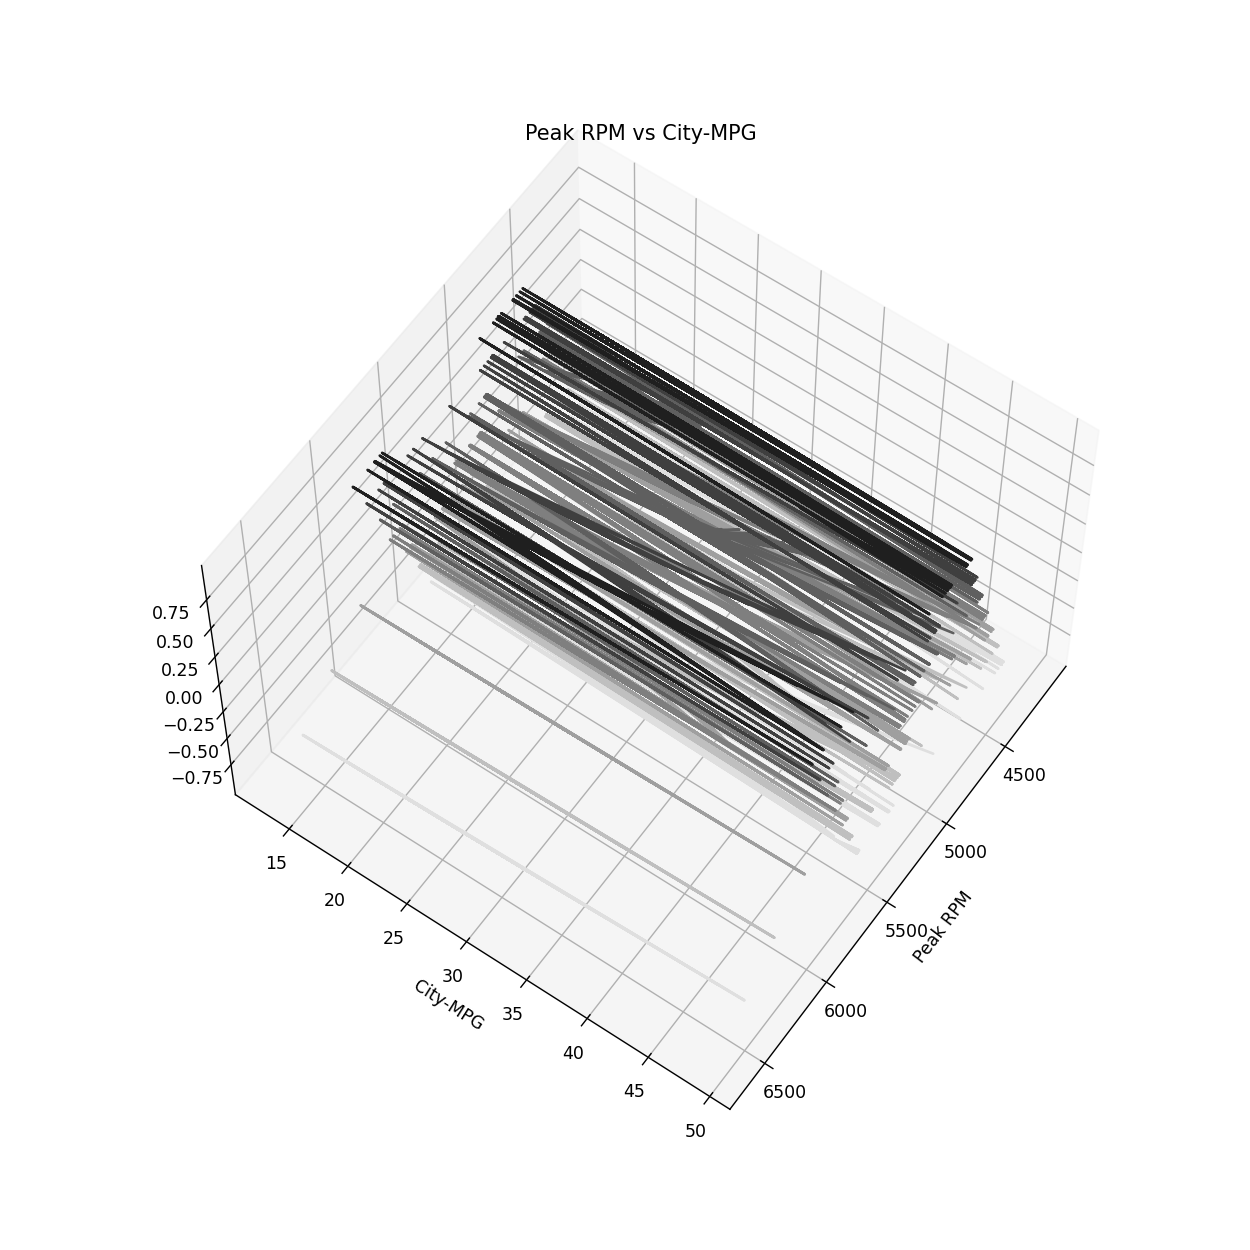

<ipython-input-33-69209e0bfd99>:14: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'edgecolor'
  ax.contour3D(X, Y, Z, rstride=1, cstride=1,


In [33]:
# Cosine for the z-function

%matplotlib notebook

def z_function(x, y):
    return np.cos(np.sqrt(x**2 + y**2))

plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
x = df['peak-rpm']
y = df['city-mpg']
X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)
ax.contour3D(X, Y, Z, rstride=1, cstride=1,
               cmap='binary', edgecolor='none')

ax.set_xlabel("Peak RPM")
ax.set_ylabel("City-MPG")
ax.set_title("Peak RPM vs City-MPG")
ax.view_init(60, 35)

plt.show()

### Tri-Surf Plot

<IPython.core.display.Javascript object>


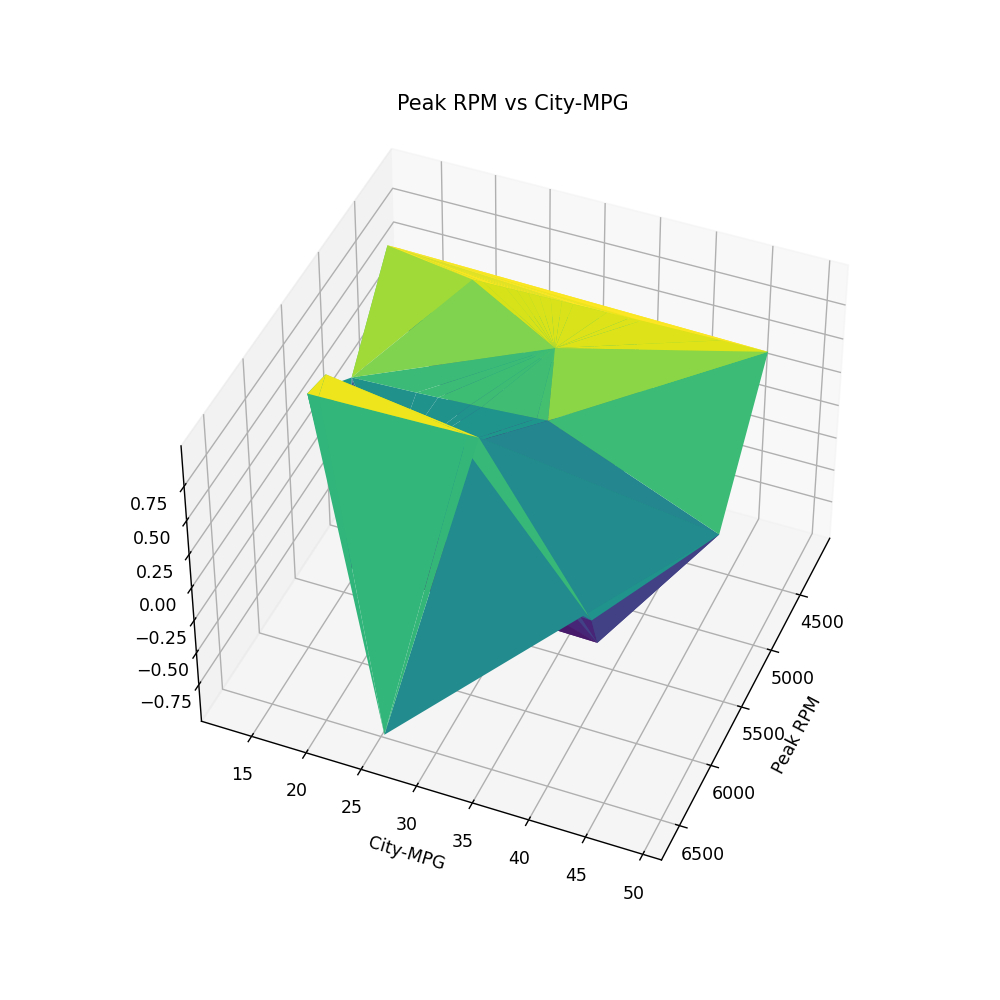

In [34]:
%matplotlib notebook

plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")

x = df['peak-rpm']
y = df['city-mpg']
z = z_function(x, y)
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none')

ax.set_xlabel("Peak RPM")
ax.set_ylabel("City-MPG")
ax.set_title("Peak RPM vs City-MPG")
ax.view_init(60, 25)

plt.show()